In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
# Make sure the path corresponds to where main.py script saves the file
data_path = '../data/search_results.csv'
data = pd.read_csv(data_path)

# Display the first few rows of the data to verify it loaded correctly
print(data.head())

             Indicator              Group          State       Subgroup  \
0  Depressive Disorder  National Estimate  United States  United States   
1  Depressive Disorder             By Age  United States  18 - 29 years   
2  Depressive Disorder             By Age  United States  30 - 39 years   
3  Depressive Disorder             By Age  United States  40 - 49 years   
4  Depressive Disorder             By Age  United States  50 - 59 years   

  Time Period Start Date Time Period End Date  Value  
0             2020-05-07           2020-05-12   24.1  
1             2020-05-07           2020-05-12   36.2  
2             2020-05-07           2020-05-12   27.7  
3             2020-05-07           2020-05-12   25.5  
4             2020-05-07           2020-05-12   24.1  


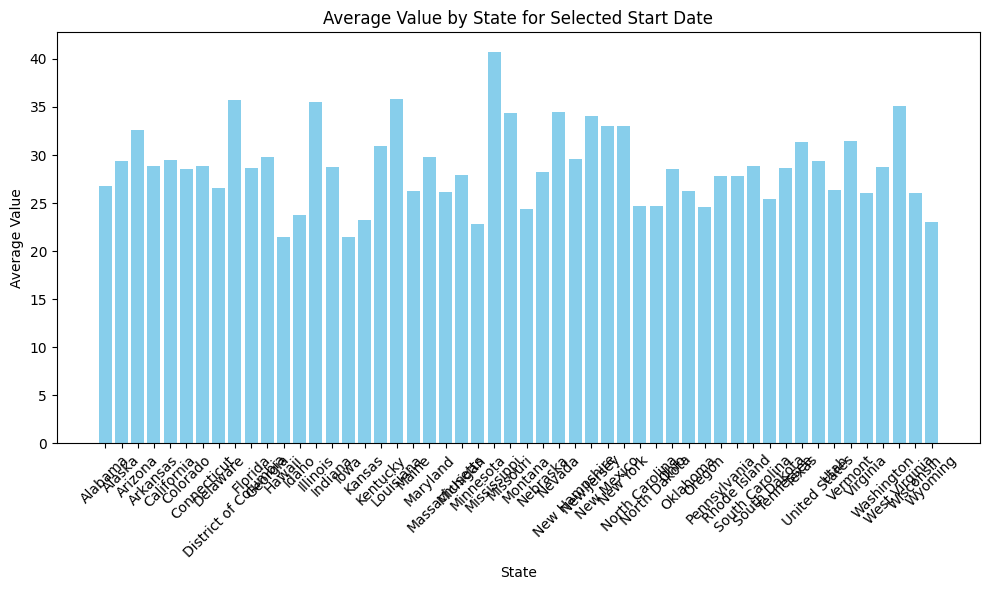

In [15]:
# Assuming you want to compare the average 'Value' across 'States'
average_values = data.groupby('State')['Value'].mean()
states = average_values.index
values = average_values.values

plt.figure(figsize=(10, 6))
plt.bar(states, values, color='skyblue')
plt.title('Average Value by State for Selected Start Date')
plt.xlabel('State')
plt.ylabel('Average Value')
plt.xticks(rotation=45)  # Rotates the state names for better visibility
plt.tight_layout()  # Adjusts subplots to give some more room
plt.show()